# Machine Learning - Assignment 1

## Naive Bayes learning algorithm for binary classification, Cross-validation, and ROC-Curves

The aim of the assignment is to implement:

* Naive Bayes learning algorithm for binary classification tasks
* Visualization to plot a ROC-curve
* A cross-validation test
* Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.

**IMPORTANT NOTE:** You may not import any more libraries than the ones already imported!

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import e, pi, sqrt

data = pd.read_csv("iris.csv").to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr
iris_setosa, iris_versicolor, iris_virginica = np.split(data, index[1:])

print(f"Full data array (features and labels):\n{iris_setosa[:3]}\n")
print("###############\n")
print(f"Train features (first 4 columns):\n{iris_setosa[:3, :-1]}\n")
print(f"Labels (last column):\n{iris_setosa[:3, -1:]}\n")
print(f"Names of labels:\n{[[numb, name] for numb, name in enumerate(mapped)]}")

Full data array (features and labels):
[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]]

###############

Train features (first 4 columns):
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Labels (last column):
[[0]
 [0]
 [0]]

Names of labels:
[[0, 'Iris-setosa'], [1, 'Iris-versicolor'], [2, 'Iris-virginica']]


In [59]:
# Example print of the 3 first datapoints (similar as above):
iris_setosa[:3]

array([[5.1, 3.5, 1.4, 0.2, 0],
       [4.9, 3.0, 1.4, 0.2, 0],
       [4.7, 3.2, 1.3, 0.2, 0]], dtype=object)

## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.

### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.

For this assignment, we recommend a 80/20-split, that is 80% of the data is used for training, 20% is used for testing.

In [60]:
def train_test_split(class_data, train_ratio=0.8):

    # shuffle data before train test separation to avoid bias
    shuffled_data = np.random.permutation(class_data)

    train_size = int(len(shuffled_data) * train_ratio)
    train = shuffled_data[:train_size]
    test = shuffled_data[train_size:]

    return train, test

In [61]:

train_setosa, test_setosa = train_test_split(iris_setosa)

print(f"Train data shape:\n{train_setosa.shape}")
print(f"Test data shape:\n{test_setosa.shape}")
print("###############\n")
print(f"First 3 train samples:\n{train_setosa[:3]}\n")
print(f"First 3 test  samples:\n{test_setosa[:3]}\n")

Train data shape:
(40, 5)
Test data shape:
(10, 5)
###############

First 3 train samples:
[[4.8 3.4 1.6 0.2 0]
 [4.8 3.0 1.4 0.1 0]
 [4.8 3.0 1.4 0.3 0]]

First 3 test  samples:
[[5.1 3.8 1.6 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [5.0 3.5 1.3 0.3 0]]



### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array: 

* **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form: 

* **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.

In [62]:
def feature_label_split(data):

    # TODO: Split one class into its features and labels
    features = data[:, :-1]
    labels = data[:, -1:]
    return features, labels

We should first test the "**Feature_label_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.

In [63]:
# TODO: Test the class splitting function
f_setosa, l_setosa = feature_label_split(iris_setosa)

# TODO: Print the output
print("X shape:", f_setosa.shape)
print("y shape:", l_setosa.shape)

print("\nFirst 3 features samples:\n", f_setosa[:3])
print("\nFirst 3 labels samples:\n", l_setosa[:3])

X shape: (50, 4)
y shape: (50, 1)

First 3 features samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

First 3 labels samples:
 [[0]
 [0]
 [0]]


We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).

In [64]:
# TODO: Use the above data handling functions to make 2 feature arrays and 2 label arrays. 
np.random.seed(1234)
train_setosa, test_setosa = train_test_split(iris_setosa)
train_versicolor, test_versicolor = train_test_split(iris_versicolor)
train_virginica, test_virginica = train_test_split(iris_virginica)

train_f_setosa, train_l_setosa = feature_label_split(train_setosa)
train_f_versicolor, train_l_versicolor = feature_label_split(train_versicolor)
train_f_virginica, train_l_virginica = feature_label_split(train_virginica)

test_f_setosa, test_l_setosa = feature_label_split(test_setosa)
test_f_versicolor, test_l_versicolor = feature_label_split(test_versicolor)
test_f_virginica,test_l_virginica=feature_label_split(test_virginica)


# TODO: Print the output (you may use multiple print-statements if you wish)
print("feauters train shape:", train_f_setosa.shape)
print("labels train shape:", train_l_setosa.shape)
print("features test shape:", test_f_setosa.shape)
print("labels test shape:", test_l_setosa.shape)

print("\nlabels test shape:\n", test_l_setosa[:3])
print("\nfeatures test shape:\n", test_f_setosa[:3])

feauters train shape: (40, 4)
labels train shape: (40, 1)
features test shape: (10, 4)
labels test shape: (10, 1)

labels test shape:
 [[0]
 [0]
 [0]]

features test shape:
 [[4.8 3.1 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [4.5 2.3 1.3 0.3]]


In [65]:
total_train_samples = ( len(train_f_setosa)
  + len(train_f_versicolor)
  + len(train_f_virginica)
)

Think a bit before going to the next task, what can easily go wrong in the above code?

## Naive Bayes learning algorithm

When implementing the Navie Bayes learning algorithm, we can break it down into its components similar to how Naive Bayes is formulated.

Common formulation:
$$
P(Y \mid X_i) = \frac{P(Y)\,P(X_i \mid Y)}{P(X_i)}
$$

In 'Plain English':
$$
\text{Posterior} = \frac{\text{Prior} \times \text{Likelihood}}{\text{Evidence}}
$$

In short, we are looking for the **posterior** based on the **prior**, **likelihood** and **evidence**.

In practice, we will calculate the **posterior** for each class and then we look for the class with the highest (max) **posterior**.

A great source of learning is the Wiki page and the example towards the end:
https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Person_classification

Below are the components which are needed to calculate the posterior for each class.

### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, and priors) for a single set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature for each class gets its own mean, standard deviation, and priors!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.

In [66]:
def calculate_feature_statistics(feature_data, total_train_samples):

    # TODO: Complete this function so that it returns the feature statistics for the input data.
    feature_data = np.asarray(feature_data, dtype=float)

    eps = 1e-9 
    means = feature_data.mean(axis=0)
    stds = feature_data.std(axis=0, ddof=0)
   # protection against std=0
    stds = np.maximum(stds, eps)
    prior = len(feature_data) / total_train_samples
    return {
        "data" : feature_data,
        "mean" : means,
        "std"  : stds,
        "prior": prior
    }# You choose how you return the statistics# You choose how you return the statistics


To make sure the function works, we should test it before proceding.

In [67]:
# TODO: Make sure to use our previous class splitting function.
train_versicolor, test_versicolor = train_test_split(iris_versicolor)
train_f_versicolor, train_l_versicolor = feature_label_split(train_versicolor)

# TODO: Test the function here for one of the dataset classes. 
stats_versicolor = calculate_feature_statistics(train_f_versicolor, total_train_samples)

# TODO: Print the output from the feature statistic function.
print("mean:", stats_versicolor["mean"])
print("std :", stats_versicolor["std"])
print("prior :", stats_versicolor["prior"])

mean: [5.885  2.71   4.19   1.2875]
std : [0.53364314 0.29816103 0.47370877 0.17491069]
prior : 0.3333333333333333


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here. 

In [68]:
def gaussian_probability_density_function(x, means, stdevs):

    probability_density = (1/(stdevs*sqrt(2*pi)))*e**(-1/2*((x-means)/stdevs)**2)

    return probability_density

### 5) Testing Gaussian PDF

We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to calculate one posterior for one class.

In [69]:
# TODO: Implement the code below to test the "gaussian_probability_density_function" function for one of the classes.
stats_setosa = calculate_feature_statistics(train_f_setosa,total_train_samples)
stats_virginica=calculate_feature_statistics(train_f_virginica,total_train_samples)
test_datapoint= test_f_setosa[0]
# TODO: Test with one datapoint from the learned class.
z = gaussian_probability_density_function(test_datapoint,stats_setosa["mean"], stats_setosa["std"])
print("test", test_f_setosa[0])
# TODO: Print the probability density
print(z)

test [4.8 3.1 1.6 0.2]
[0.9188426720702313 0.6870320043890692 1.595282979178257
 3.7079216611533736]


As a test, take one datapoint from one of the other classes and see if the predicted probability changes.

In [70]:
# TODO: Take one datapoint from one of the other classes.
other_class_datapoint = test_f_versicolor[0]

# TODO: Use naive bayes gaussian on this datapoint with the same feature statistics as the first class.
pdf_other = gaussian_probability_density_function(other_class_datapoint, stats_setosa["mean"], stats_setosa["std"])

# TODO: Print the probability
print("Gaussian PDF per feature (other class):", pdf_other)
print("Likelihood (product, other class):", np.prod(pdf_other))

Gaussian PDF per feature (other class): [0.29914059255891046 0.016744923916327512 6.704884039270421e-47
 6.058535140678632e-16]
Likelihood (product, other class): 2.034779860783182e-64


Think a bit why the probability changes, what could affect the prediction?

## Prepare Naive Bayes for binary classification

### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.

In [71]:
train_classA, test_classA = train_setosa, test_setosa
train_classB, test_classB = train_versicolor, test_versicolor

# TODO: Sepearte the features and lables for both the train and test set.
train_f_classA, train_l_classA = train_f_setosa, train_l_setosa
train_f_classB, train_l_classB = train_f_versicolor, train_l_versicolor

test_f_classA, test_l_classA = test_f_setosa, test_l_setosa
test_f_classB, test_l_classB = test_f_versicolor, test_l_versicolor

print(train_f_classA.shape, train_l_classA.shape)
print(train_f_classB.shape, train_l_classB.shape)


(40, 4) (40, 1)
(40, 4) (40, 1)


### 7) Class A vs Class B for binary classification

We have to get the posterior from two classes and compare the two posteriors in order to make a propper prediction.

For this, we need a function that calculates the posteriors for each class in binary classification and outputs the one with the highest posterior.

**IMPORTANT NOTES**:
1) When we are calculating the **Likelihood**, we are multiplying a small for each feature, making the result very very small. This can be problematic if we have a lot of features. Because of this, to make the calculation numerically stable, we instead calculate the sum of log feature likelihood:
$$
\prod_{i} P(X_i \mid Y) \rightarrow \sum_{i} \text{log}( P(X_i \mid Y) )
$$
2) We are **not** calculating probabilities, we are calculating **priors** and **likelihoods**. A lot of people make this misstaken. **Priors** and **likelihoods** can be less or more than 1 (even when summed up) and this is normal behavior.


In [72]:
feature_stats = {
    "setosa": stats_setosa,
    "versicolor": stats_versicolor
   # "virginica":stats_virginica
}

def naive_bayes_prediction(data_point, feature_stats):

    # TODO: Implement the rest of this function. Make use of previous functions that you have implemented.
    data_point = np.asarray(data_point, dtype=float)

    prediction_class = None
    best_log_posterior = -np.inf

    for class_name, stats in feature_stats.items():
        means = stats["mean"]
        stdevs = stats["std"]
        prior = stats["prior"]

        # Gaussian PDF per feature
        pdf = gaussian_probability_density_function(data_point, means, stdevs)

        # avoid log(0)
        eps = 1e-300
        pdf = np.maximum(pdf, eps)

        log_posterior = np.log(prior) + np.sum(np.log(pdf))

        if log_posterior > best_log_posterior:
            best_log_posterior = log_posterior
            prediction_class = class_name
    # NOTE: We need to compare the posteriors at some point between the classes we test on, the predicted class should be the class with the highest posterior.

    return prediction_class
def get_model_scores(data_points, feature_stats, pos_class):
    all_probs = []
    classes = list(feature_stats.keys())
    if len(classes) != 2:
        raise ValueError("feature_stats must contain exactly 2 classes for binary ROC.")
    neg_class = classes[0] if classes[1] == pos_class else classes[1]
    for x in data_points:
        logs = {}
        for class_name, stats in feature_stats.items():
            pdf = gaussian_probability_density_function(x, stats["mean"], stats["std"])
            pdf = np.maximum(pdf, 1e-300)
            prior_log = np.log(float(stats["prior"]))
            likelihood_log = np.sum(np.log(np.asarray(pdf, dtype=float)))
            
            logs[class_name] = prior_log + likelihood_log
        log_pos = logs[pos_class]
        other_class = [c for c in logs.keys() if c != pos_class][0]
        log_neg = logs[other_class]
        
        max_l = max(log_pos, log_neg)
        prob = np.exp(log_pos - max_l) / (np.exp(log_pos - max_l) + np.exp(log_neg - max_l))
        all_probs.append(prob)
        
    return np.array(all_probs)

To test the function we need the feature statistics from the classes we choose. 

**Note:** Choose the correct train/test set and the correct feature/label split!

In [73]:

# TODO: Get the feature metrics for the classes.
stats_setosa = calculate_feature_statistics(train_f_setosa, total_train_samples)
stats_versicolor = calculate_feature_statistics(train_f_versicolor, total_train_samples)
stats_virginica=calculate_feature_statistics(train_f_virginica,total_train_samples)
feature_stats = {
   # "setosa": stats_setosa,
    "versicolor": stats_versicolor,
    "virginica": stats_virginica
}

Now we should have implemented all the neccessary parts to train a naive bayes algorithm and do inference on it. Implement a small test workflow for two of your chosen classes.

In [74]:

# TODO: Test the "naive_bayes_prediction" function and implement all neccessary code for it to work.
# TODO: Print the predicted class and the actual class for the test set
for i in range(5):
    x = test_f_setosa[i]
    predicted = naive_bayes_prediction(x, feature_stats)
    print(f"Predicted: {predicted} | Actual: setosa")

Predicted: versicolor | Actual: setosa
Predicted: versicolor | Actual: setosa
Predicted: versicolor | Actual: setosa
Predicted: versicolor | Actual: setosa
Predicted: versicolor | Actual: setosa


## ROC-curve

A ROC curve, or *Receiver Operating Characteristic curve*, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.

### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is is a value that goes from 0 to 1. 

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)

In [75]:
# Stepsize demonstration
print("Python list:", [x/10 for x in range(0,10,1)])

# Stepsize demonstration with numpy:
print("Numpy linspace:", np.linspace(0,1,11))
print("Numpy linspace (no endpoint):", np.linspace(0,1,10,endpoint=False))

Python list: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Numpy linspace: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy linspace (no endpoint): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [76]:
def TPR_and_FPR(prediction_probabilities, test_labels, threshold_stepsize = 0.1):
    TPR, FPR = [], []
    
    num_steps = int(1 / threshold_stepsize) + 1
    thresholds = np.linspace(0, 1, num_steps)

    y_true = np.asarray(test_labels).astype(int)
    for threshold in thresholds:

        predictions=(prediction_probabilities>=threshold).astype(int)

        TP=np.sum((predictions==1) & (y_true==1)) 
        FP=np.sum((predictions==1) & (y_true==0)) 
        TN=np.sum((predictions==0) & (y_true==0)) 
        FN=np.sum((predictions==0) & (y_true==1)) 

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0.0

        TPR.append(tpr)
        FPR.append(fpr)

    return TPR, FPR


In [77]:
pos_class_name = "versicolor" 

test_features_combined = np.vstack((test_f_virginica, test_f_versicolor))

test_labels_combined = np.concatenate([
    np.zeros(len(test_f_virginica)), 
    np.ones(len(test_f_versicolor))
])

prediction_probs = get_model_scores(test_features_combined, feature_stats, pos_class=pos_class_name)

tpr_list, fpr_list = TPR_and_FPR(prediction_probs, test_labels_combined, threshold_stepsize=0.01)

print(f"Testing {pos_class_name} as Positive Class")
print(f"FPR values: {fpr_list}")
print(f"TPR values: {tpr_list}")

Testing versicolor as Positive Class
FPR values: [np.float64(1.0), np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1)

How does the values change if you change the threshold stepsize? 

How does the values change if you change the classes you compare?

### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.

In [78]:
def plot_ROC(TPR, FPR):

    auc=0.0
    for i in range (len(FPR)-1):
        width=abs(FPR[i+1]-FPR[i])
        height=(TPR[i]+TPR[i+1])/2.0
        auc+=width*height

    plt.figure(figsize=(8,6))
    plt.plot(FPR, TPR, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    # TODO: Add a "middle-line" in the plot. This can be seen as the "better/worse than random" line.

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) # Slight overhead so the line isn't cut off at the top
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)

    plt.show()


Number of FPR points: 11
Number of TPR points: 11
First 3 FPR: [np.float64(1.0), np.float64(0.3), np.float64(0.2)]
First 3 TPR: [np.float64(1.0), np.float64(0.9), np.float64(0.9)]


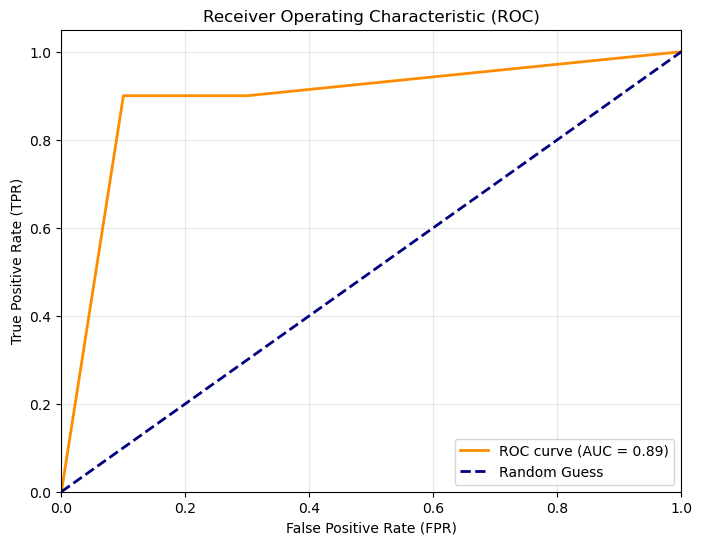

In [84]:
#test_fpr = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#test_tpr = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 1. Define Positive Class
pos_class_name = "virginica" 

# 2. Combine Features
test_features_combined = np.vstack((test_f_versicolor, test_f_virginica))
# 3. Create Labels (0 for versicolor, 1 for virginica)
test_labels_combined = np.concatenate([
    np.zeros(len(test_f_versicolor)), 
    np.ones(len(test_f_virginica))
])

# 4. Generate Scores
# Ensure your feature_stats dictionary now contains "versicolor" and "virginica"
prediction_probs = get_model_scores(test_features_combined, feature_stats, pos_class=pos_class_name)

# 5. Evaluate and Plot
tpr_v, fpr_v = TPR_and_FPR(prediction_probs, test_labels_combined, threshold_stepsize=0.1)
print(f"Number of FPR points: {len(fpr_v)}")
print(f"Number of TPR points: {len(tpr_v)}")
print(f"First 3 FPR: {fpr_v[:3]}")
print(f"First 3 TPR: {tpr_v[:3]}")
plot_ROC(tpr_v, fpr_v)

## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.

### 10) Cross-validation loop

In [87]:
from sklearn.model_selection import KFold
def cross_validation(data, target, folds = 10, threshold_stepsize = 0.1):
    data = np.asarray(data, dtype=float)
    target = np.asarray(target, dtype=int)

    rng = np.random.default_rng(55)
    idx = np.arange(len(data))
    rng.shuffle(idx)
    data = data[idx]
    target = target[idx]
    
    fold_sizes = np.full(folds, len(data) // folds, dtype=int)
    fold_sizes[:len(data) % folds] += 1

    all_tpr = []
    all_fpr = []

    start = 0
    for i in range(folds):
        end = start + fold_sizes[i]

        # Split into test fold and the rest train
        X_test  = data[start:end]
        y_test  = target[start:end]

        X_train = np.concatenate([data[:start], data[end:]], axis=0)
        y_train = np.concatenate([target[:start], target[end:]], axis=0)

        # Train NB on TRAIN fold (build feature_stats)
        X0 = X_train[y_train == 0]   # negative class
        X1 = X_train[y_train == 1]   # positive class

        total_train = len(X_train)
        stats0 = calculate_feature_statistics(X0, total_train)
        stats1 = calculate_feature_statistics(X1, total_train)

        # IMPORTANT:
        # get_model_scores expects a dict of classes. For binary ROC, use exactly 2 classes.
        #  the positive class "pos" and negative class "neg".
        feature_stats = {
            "neg": stats0,
            "pos": stats1
        }

        #  Scores on TEST fold (probability of pos)
        prediction_probs = get_model_scores(X_test, feature_stats, pos_class="pos")

        # 5) TPR/FPR for this fold
        tpr, fpr = TPR_and_FPR(prediction_probs, y_test, threshold_stepsize=threshold_stepsize)

        all_tpr.append(tpr)
        all_fpr.append(fpr)

        start = end

    # Because every fold used same threshold_stepsize => tpr/fpr lists have same length
    mean_tpr = np.mean(np.array(all_tpr, dtype=float), axis=0)
    mean_fpr = np.mean(np.array(all_fpr, dtype=float), axis=0)

    plot_ROC(mean_tpr, mean_fpr)


### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

* Iris-setosa vs Iris-versicolor
* Iris-setosa vs Iris-virginica
* Iris-versicolor vs Iris-virginica

In [81]:
# TODO: Implement and test cross-validation function on all classes.

In [82]:
# TODO: Implement and test cross-validation function on all classes.

In [83]:
# TODO: Implement and test cross-validation function on all classes.

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why is it called "naive bayes"?

2) What are some downsides of the naive bayes learning algorithm?

3) When using ROC-curves, what is the theoretical best and worst result you can get?

4) When using ROC-curves, in this assignment for example, is a higher threshold-stepsize always better?  


# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!